# Import Dependencies

In [2]:
import pandas as pd
import numpy as np

from config import CSV_FILE_URL
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier

# Read in CSV

In [3]:
df = pd.read_csv(CSV_FILE_URL)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Clean the Data

In [5]:
# Drop the null columns 
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.shape

(284807, 31)

There are no null values

# Data Exploration

In [7]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


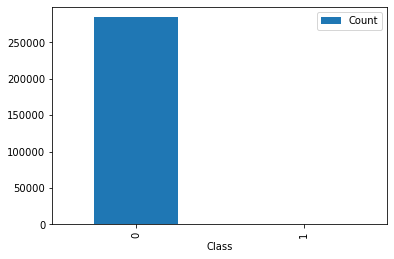

In [10]:
grouped_df = df[['Class', 'Time']].groupby('Class').count()
grouped_df = grouped_df.rename(columns={'Time':"Count"})
grouped_df.plot(kind='bar')

We can see from the plot above that the data is highly imbalanced. There are only 492 fraudulent out of 284,315 transactions, or 0.17%.



# Defining Features

In [12]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
selected_features = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
selected_features.shape

(284807, 30)

In [15]:
# Defining predictor and target features to X and y respectively.
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['Class']].values.reshape(-1,1)

print("Shape: ", X.shape, y.shape)

Shape:  (284807, 30) (284807, 1)


# Create a Train Test Split

In [16]:
# Using sklearn's 'train_test_split' to split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (213605, 30) (213605, 1) (71202, 30) (71202, 1)


# Data Pre-processing

In [17]:
# Scale the data
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

# Train the Model

In [18]:
gradientBoostedTree = GradientBoostingClassifier()
gradientBoostedTree

GradientBoostingClassifier()

In [19]:
gradientBoostedTree.fit(X_train_scaled, y_train.flatten())

GradientBoostingClassifier()

In [20]:
print(f"Training Data Score: {gradientBoostedTree.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {gradientBoostedTree.score(X_test_scaled, y_test)}")

Training Data Score: 0.9985814938788886
Testing Data Score: 0.9984410550265442


In [21]:
# Make predictions with the model
gradientBoostedPredictions = gradientBoostedTree.predict(X_test_scaled)

In [22]:
gradientBoostedPredictProba = gradientBoostedTree.predict_proba(X_test_scaled)[:,1]

In [23]:
# Print classification report
print(classification_report(y_test.flatten(), gradientBoostedPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
print("Accuracy:", accuracy_score(y_test.flatten(), gradientBoostedPredictions))

                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.52      0.20      0.29       113

      accuracy                           1.00     71202
     macro avg       0.76      0.60      0.65     71202
  weighted avg       1.00      1.00      1.00     71202

Accuracy: 0.9984410550265442


Gradient Boosting Classifier
Accuracy:  0.9984410550265442
Precision:  0.5227272727272727
Recall:  0.20353982300884957
F1-Score:  0.2929936305732484
AUC score:  0.6016222093282794
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.52      0.20      0.29       113

      accuracy                           1.00     71202
     macro avg       0.76      0.60      0.65     71202
  weighted avg       1.00      1.00      1.00     71202



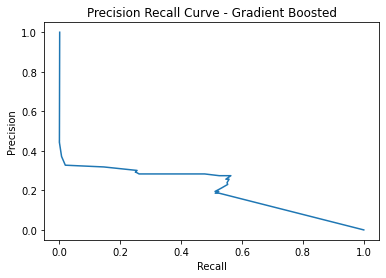

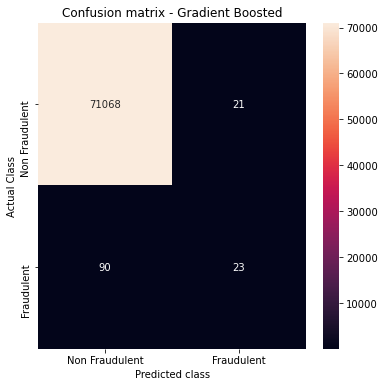

In [24]:
print("Gradient Boosting Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), gradientBoostedPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), gradientBoostedPredictions))
print("Recall: ",recall_score(y_test.flatten(), gradientBoostedPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), gradientBoostedPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), gradientBoostedPredictions))
print(classification_report(y_test.flatten(), gradientBoostedPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), gradientBoostedPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Gradient Boosted')

confusionMatrix = confusion_matrix(y_test.flatten(), gradientBoostedPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Gradient Boost") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()